In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/unsupervised-learning-on-country-data/Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
X = np.array((df[['income', 'gdpp']]).astype(float))
X.shape

(167, 2)

# Mean Normalization

In [5]:
n = X.shape[1]
for j in range(n):
    X[:, j] -= np.mean(X[:, j])
    print(np.mean(X[:, j]))

-1.13278382017227e-12
5.77284062203176e-13


# Initializing Centroids

In [6]:
k = 3
(m, n) = X.shape
mu = np.random.randint(1, 10, (k, n))
print(mu)

[[3 3]
 [5 5]
 [7 8]]


# Finding Closest Centroids

In [7]:
def find_closest_centroids(X, mu):
    m = X.shape[0]
    k = mu.shape[0]
    c = np.zeros([m, 1])
    distance = np.zeros([m, k])
    for i in range(m):
        for j in range(k):
            distance[i, j] = np.sum((X[i, :] - mu[j, :])**2)
        dist = list(distance[i, :])
        c[i, 0] = dist.index(min(dist))
    return c

In [8]:
c = find_closest_centroids(X, mu)
print(c[:5])

[[0.]
 [0.]
 [0.]
 [0.]
 [2.]]


# Compute Centroids

In [9]:
def compute_centroids(X, c, mu):
    (k, n) = mu.shape
    m = X.shape[0]
    for i in range(k):
        points = []
        for j in range(m):
            if c[j, 0] == i:
                points.append(j)
        for j in range(n):
            mu[i, j] = np.mean(X[points, j])
    return mu

In [10]:
compute_centroids(X, c, mu)

array([[-10134,  -9556],
       [  3605,  -3029],
       [ 22512,  21480]])

# Optimization Objective / Cost Function

In [11]:
def cost_function(X, mu, c):
    m = X.shape[0]
    J = 0
    for i in range(m):
        idx = int(c[i, 0])
        J += np.sum((X[i, :] - mu[idx, :])**2)
    return J / m

# K-Means Clustering

## Iterations showing clusters imporoved by K-Means Algorithm after every iteration

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


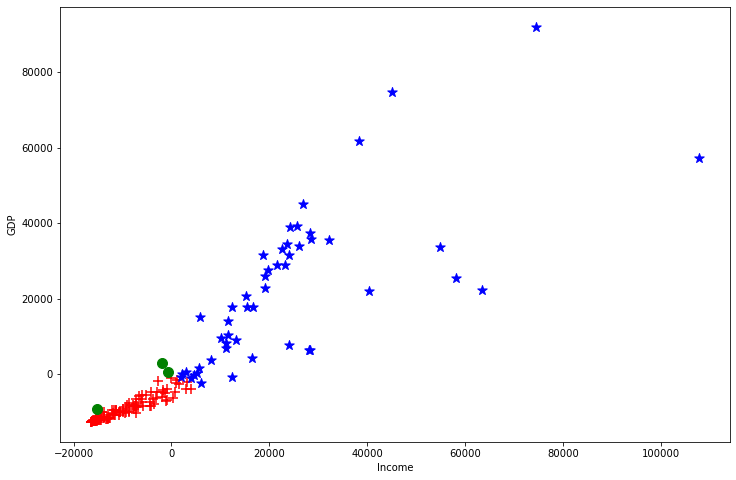

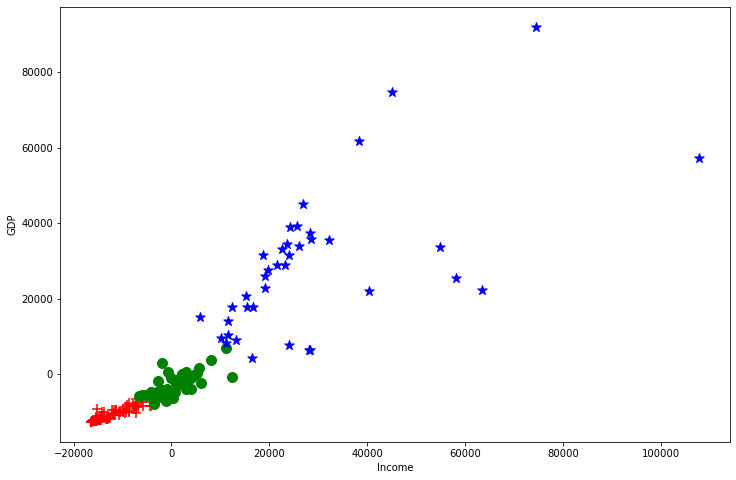

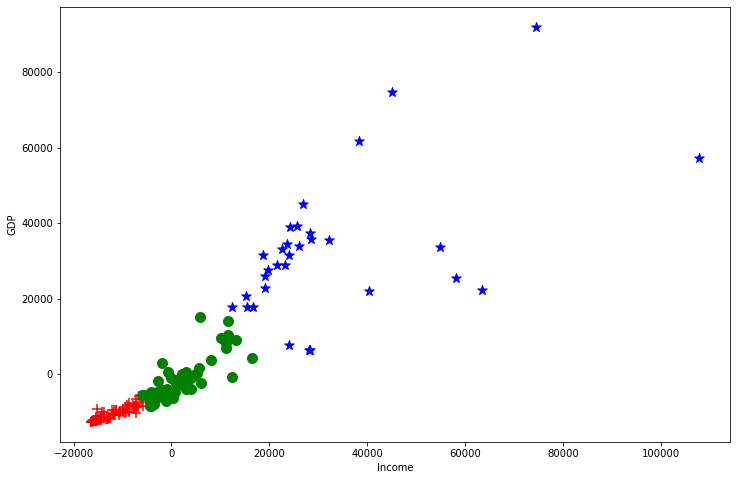

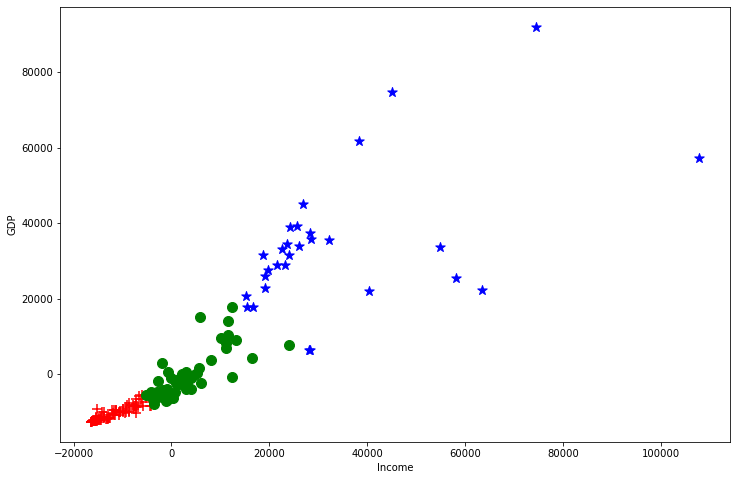

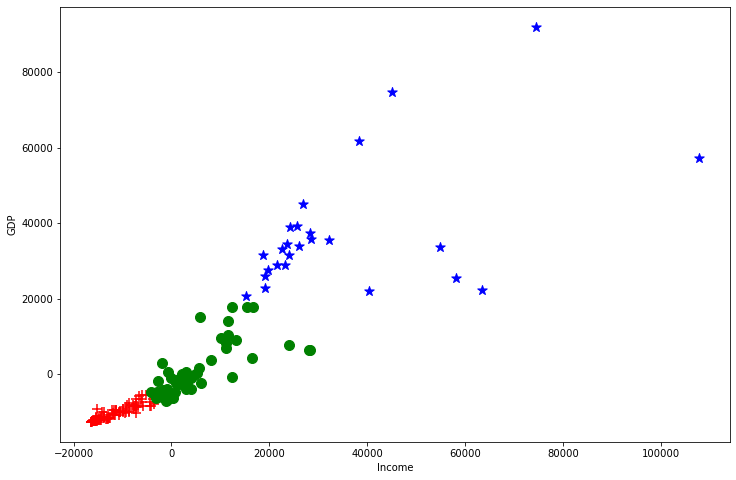

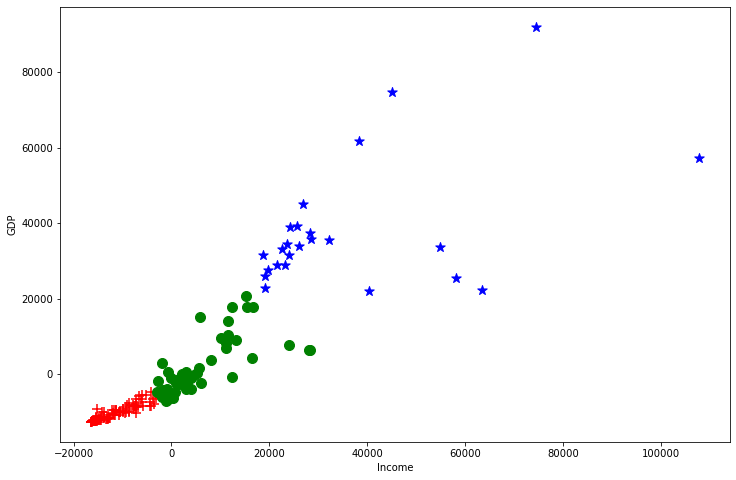

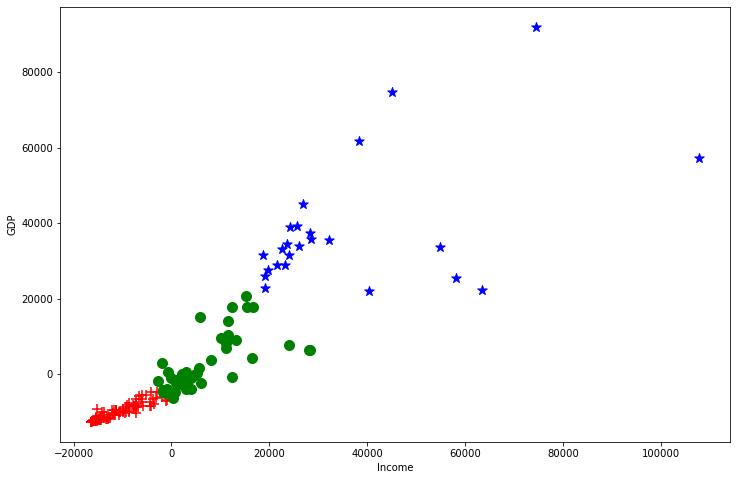

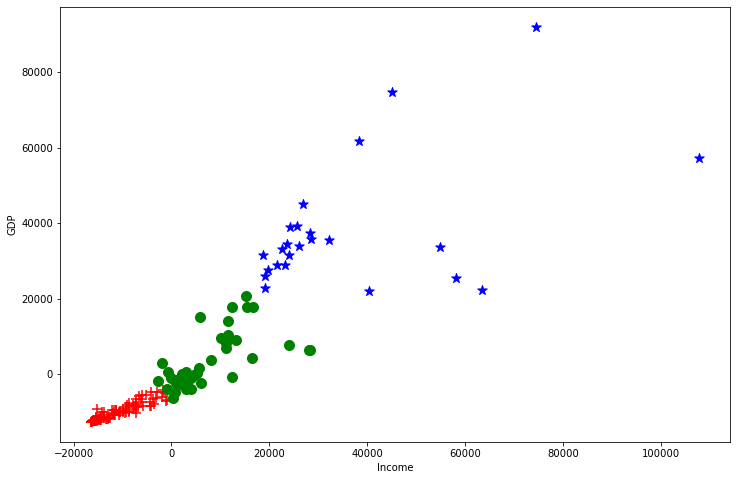

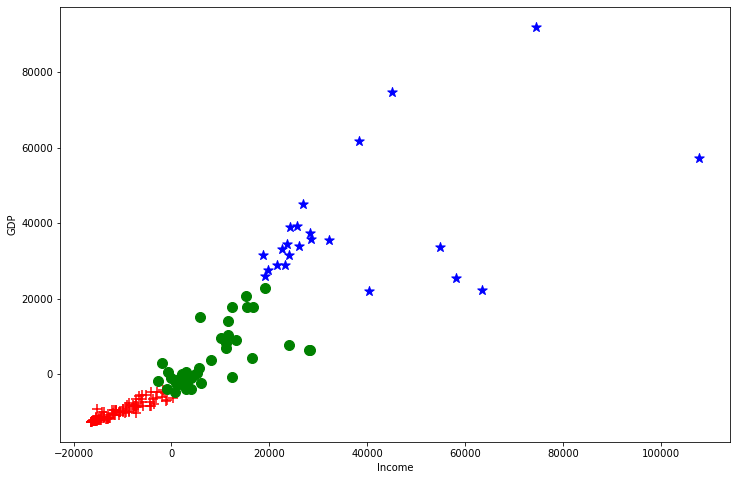

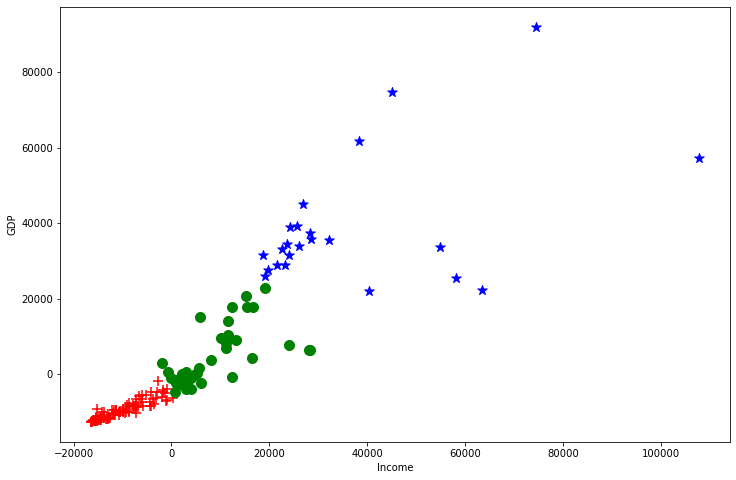

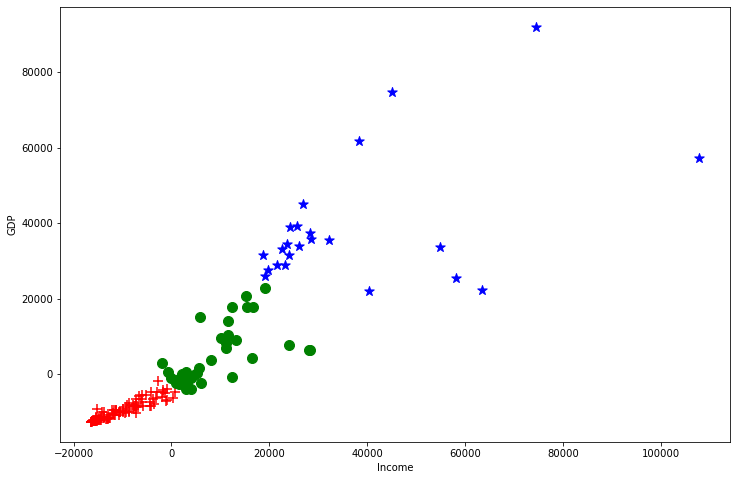

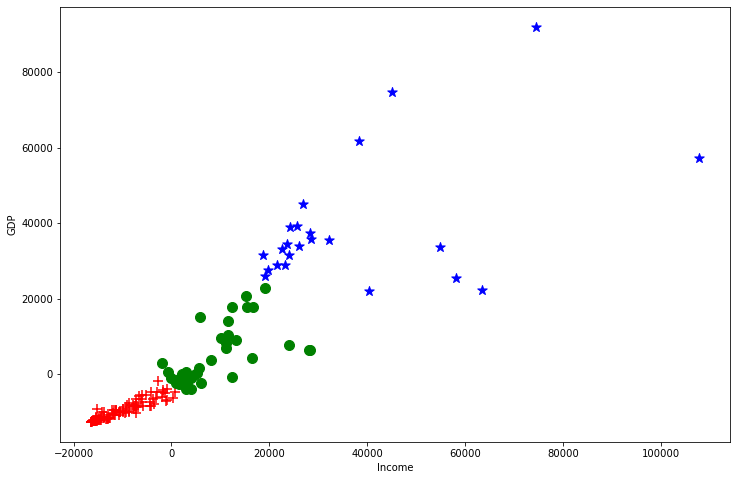

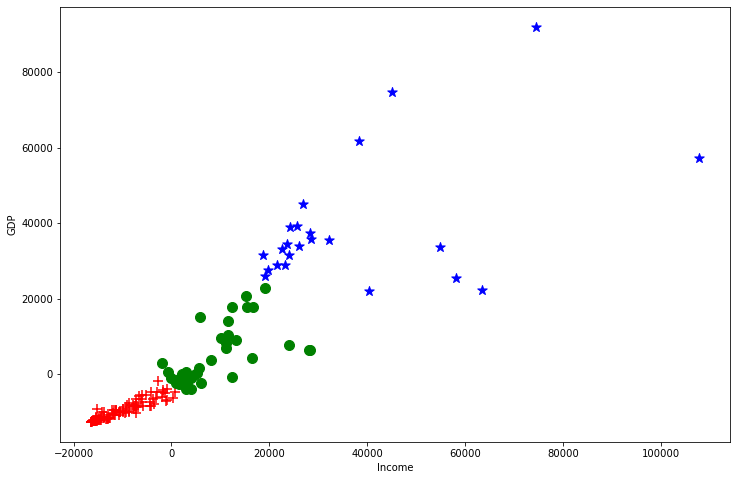

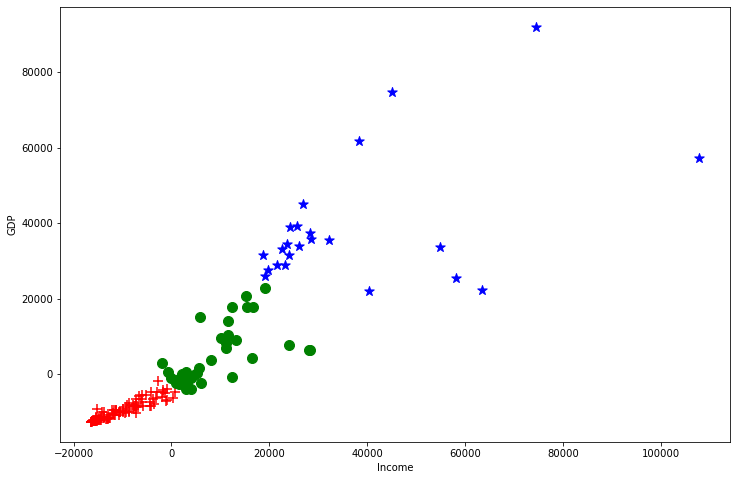

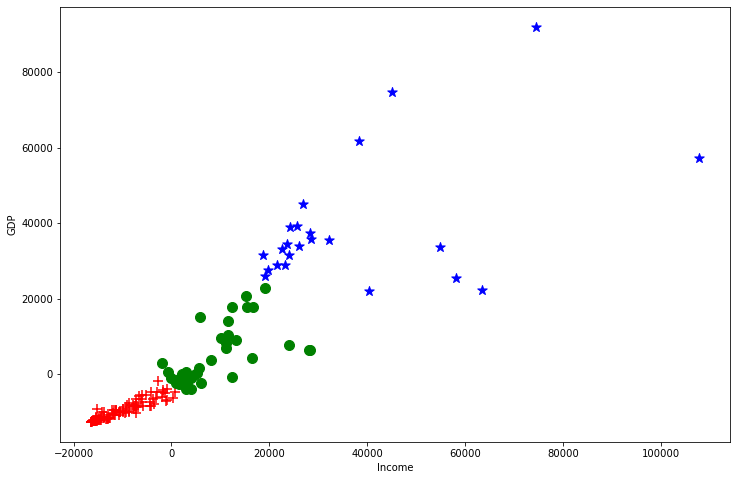

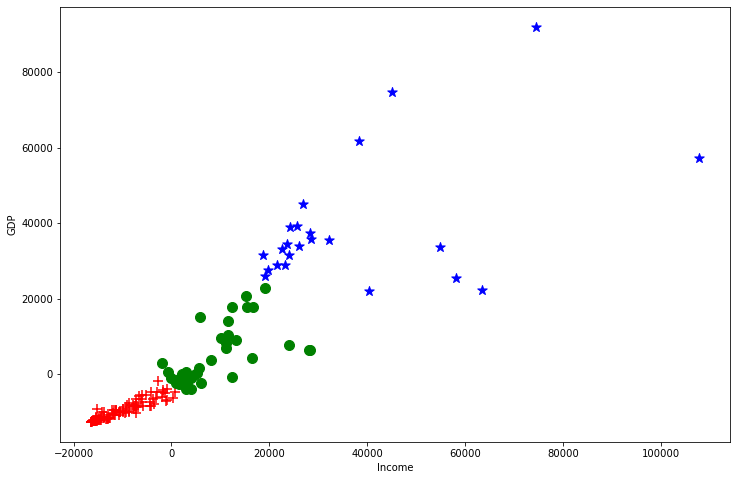

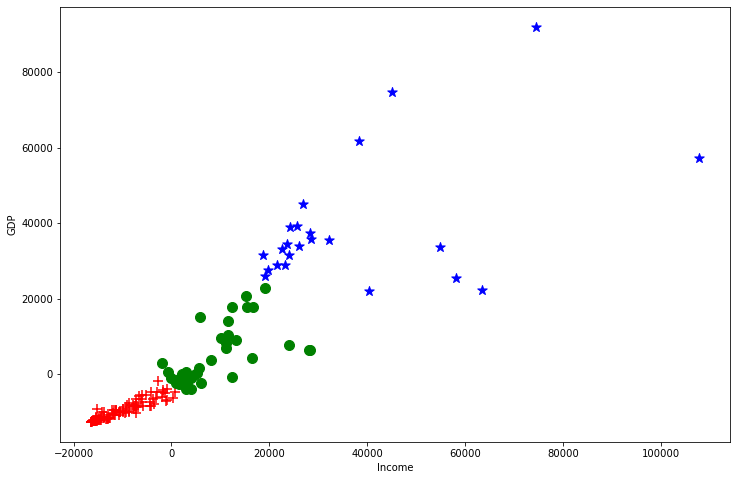

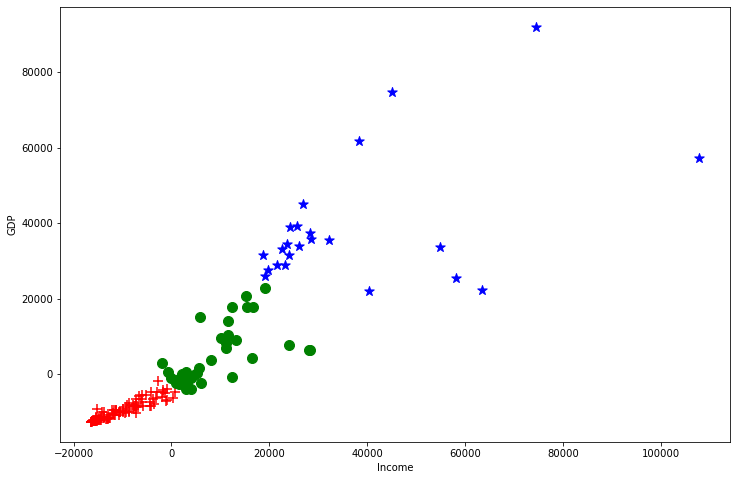

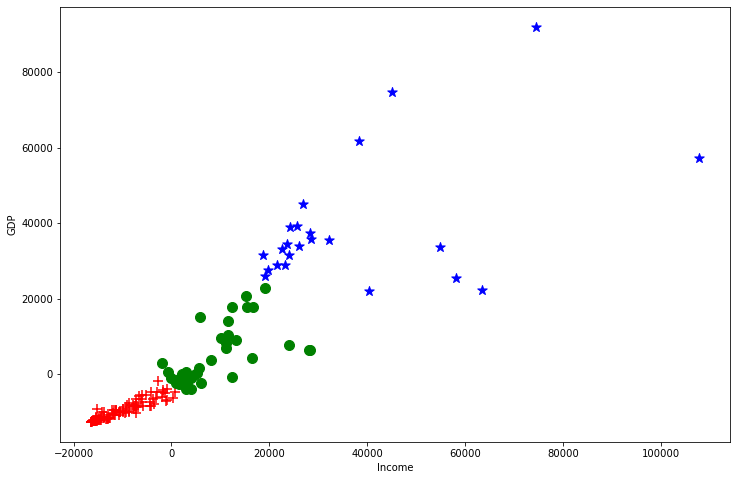

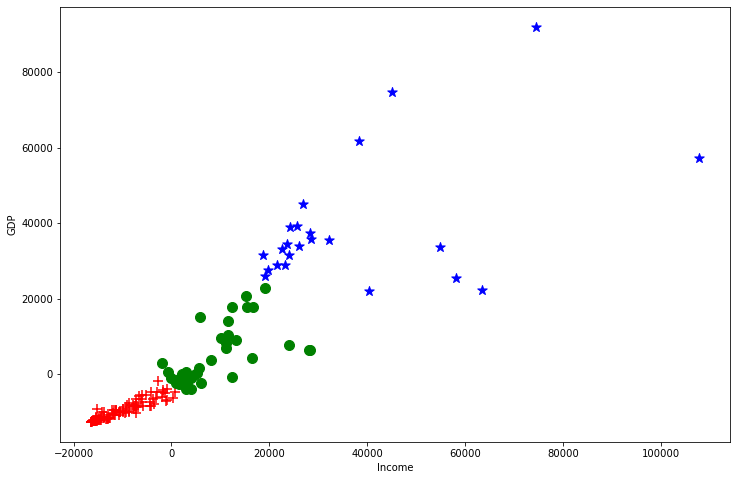

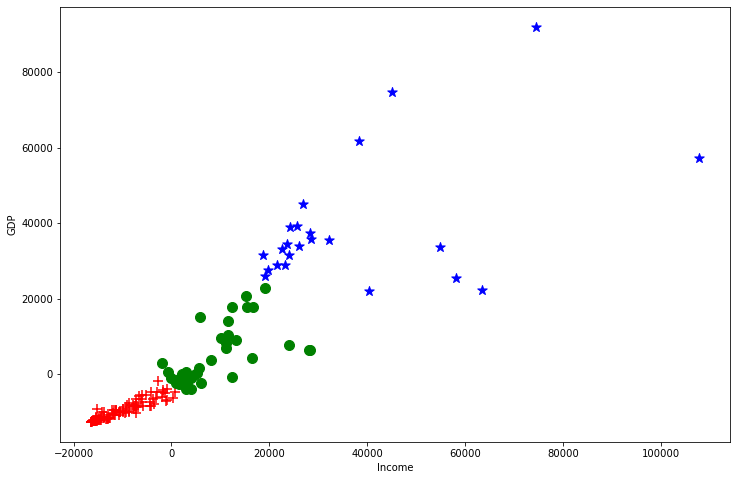

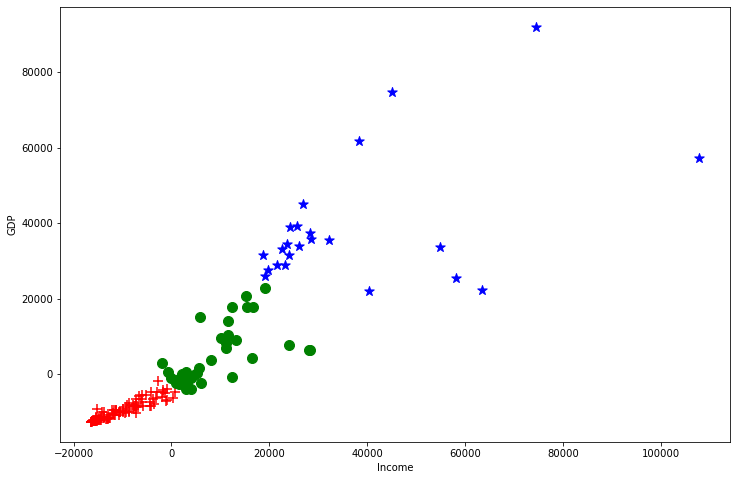

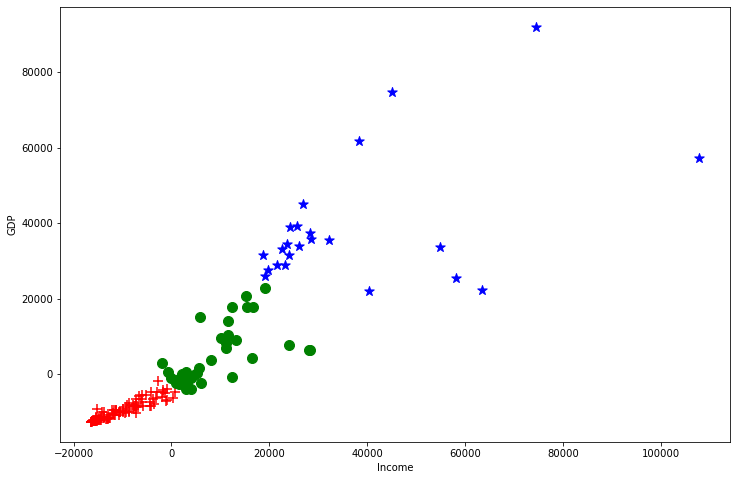

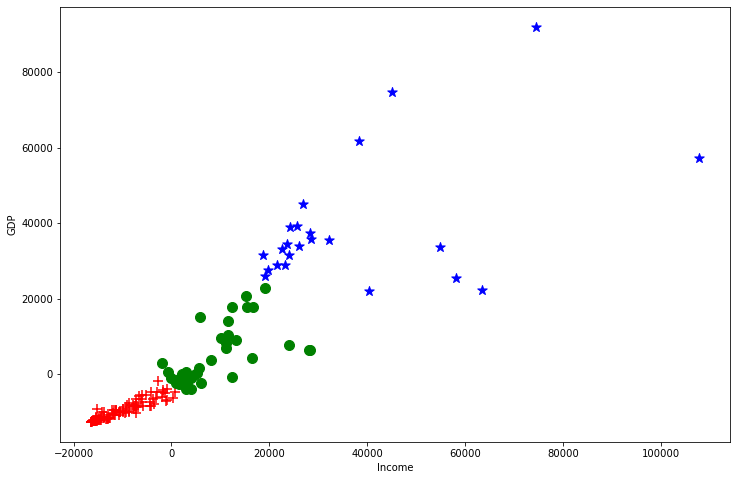

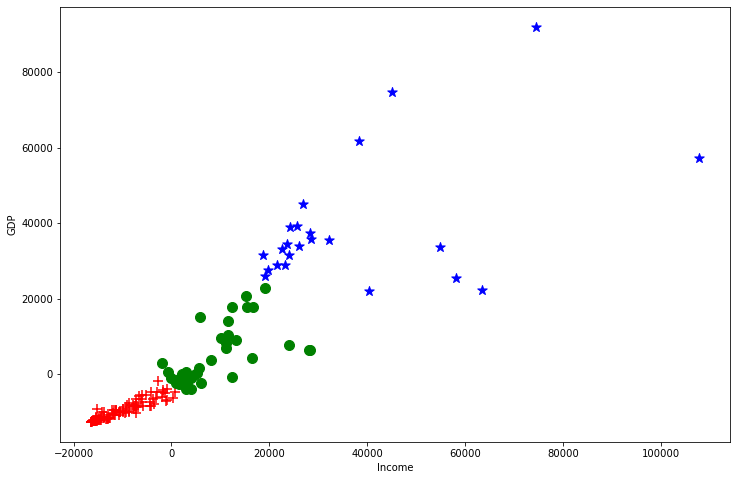

In [12]:
k = 3
max_iters = 25
np.random.seed(0)
mu = np.random.randint(1, 10, (k, n))
for i in range(max_iters):
    idx = find_closest_centroids(X, mu)
    centroids = compute_centroids(X, idx, mu)
    plt.figure(figsize = (12, 8))
    color = ['r', 'g', 'b']
    mark = ['+', 'o', '*']
    for i in range(k):
        points = []
        for j in range(m):
            if idx[j, 0] == i:
                points.append(j)
        plt.scatter(X[points, 0], X[points, 1], c = color[i], marker = mark[i], s = 100)
    plt.xlabel("Income")
    plt.ylabel("GDP")

**As it can be observed from the last two plots that they are exactly same, hence concludes the K-Means Algorithm trying to find best clusters for the given data.**

## Final K-Means Plot

Text(0, 0.5, 'GDP')

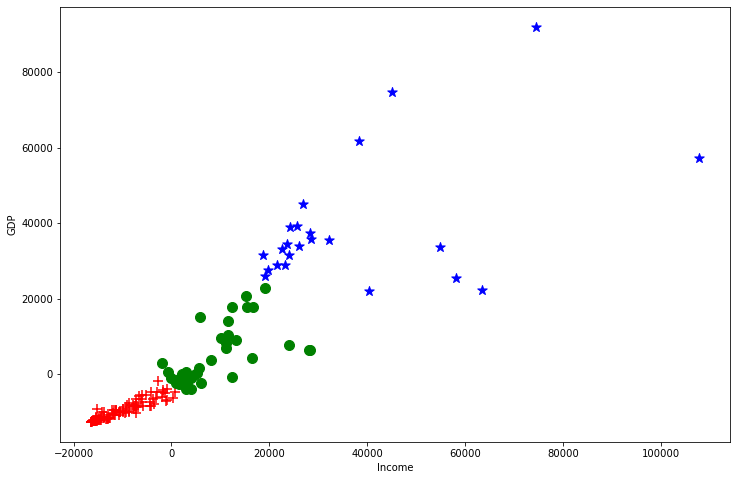

In [13]:
plt.figure(figsize = (12, 8))
color = ['r', 'g', 'b']
mark = ['+', 'o', '*']
for i in range(k):
    points = []
    for j in range(m):
        if idx[j, 0] == i:
            points.append(j)
    plt.scatter(X[points, 0], X[points, 1], c = color[i], marker = mark[i], s = 100)
plt.xlabel("Income")
plt.ylabel("GDP")

In [14]:
cost_function(X, centroids, idx)

146427300.8027179

# K-Means by Monte-Carlo Method

minimum cost: 199242733.07927847


Text(0, 0.5, 'GDP')

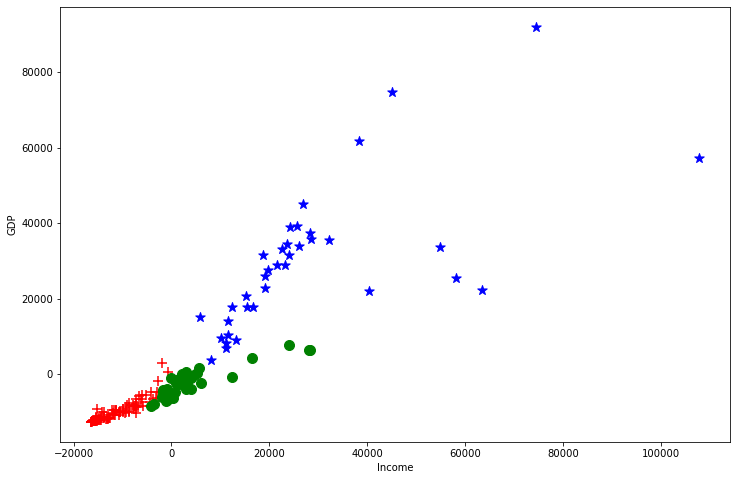

In [15]:
k = 3
(m, n) = X.shape
indexes = []
costs = []
for i in range(100):
    mu = np.random.randint(1, 10, (k, n))
    idx = find_closest_centroids(X, mu)
    if (0 not in idx) or (1 not in idx) or (2 not in idx):
        pass
        #print("something's missing")
    else:
        centroids = compute_centroids(X, idx, mu)
        J = cost_function(X, centroids, idx)
        #print(J)
        costs.append(J)
        indexes.append(idx)
i_min = costs.index(min(costs))
best_clusters = indexes[i_min]
print(f"minimum cost: {costs[i_min]}")

plt.figure(figsize = (12, 8))
color = ['r', 'g', 'b']
mark = ['+', 'o', '*']
for i in range(k):
    points = []
    for j in range(m):
        if best_clusters[j, 0] == i:
            points.append(j)
    plt.scatter(X[points, 0], X[points, 1], c = color[i], marker = mark[i], s = 100)
plt.xlabel("Income")
plt.ylabel("GDP")

**It can be easily observed that even after using 100 random samples, it cannot give a better result. Still the iteration method of finding best position for cluster centroids gives a better output with just 5 iterations.**

Hence our implementation of K-Means Clustering from Scratch works just fine.

# Prinicipal Component Analysis (PCA)

In [16]:
features = np.array(df.drop(['country'], axis = 1))
print(features.shape)

(167, 9)


In [17]:
m = features.shape[0]
sigma = np.dot(features.T, features) / m
print(sigma.shape)

(9, 9)


In [18]:
u, s, v = np.linalg.svd(sigma)
print(u.shape, s.shape, v.shape)

(9, 9) (9,) (9, 9)


In [19]:
dim = range(1, 9)
variance = []
for i in dim:
    v = np.sum(s[:i]) / np.sum(s)
    variance.append(v)
print(variance)

[0.9658099448209196, 0.9999930155428557, 0.9999983248180143, 0.9999993623201198, 0.9999998190433819, 0.9999999343119869, 0.9999999958004623, 0.9999999994685705]


***For taking a suitable dimension for PCA variance retained should be greater than 0.99, which is we're getting for 2 dimension for columns of the data. Hence we can reduce the data upto 2D.***

In [20]:
d = 2
u_reduce = u[:, 0:d]
print(u_reduce.shape)

(9, 2)


Getting reduced dimension data with all training examples & the new features

In [21]:
z = np.dot(features, u_reduce)
print(z.shape)

(167, 2)


## Applying K-Means Clustering

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


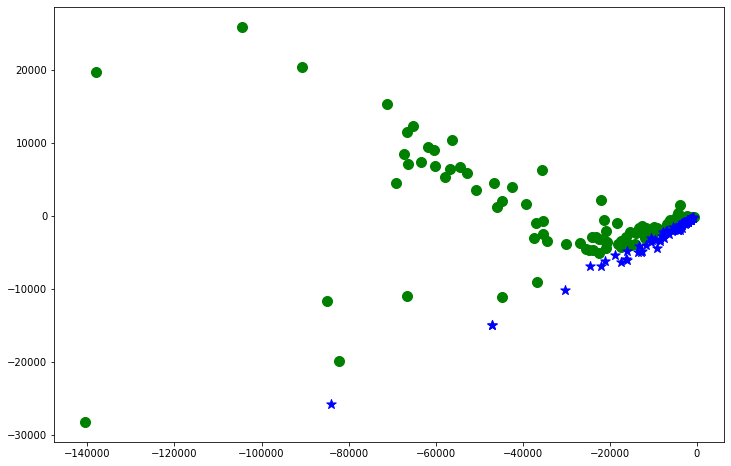

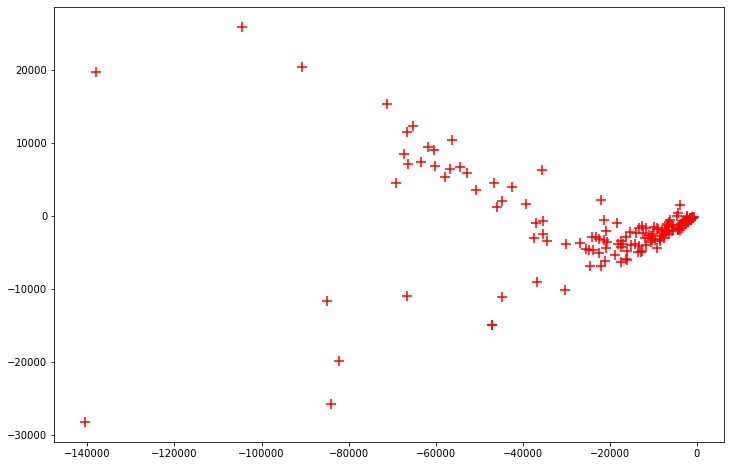

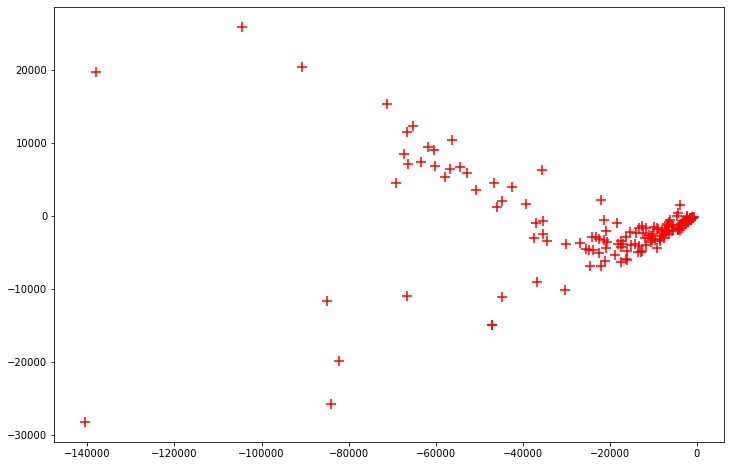

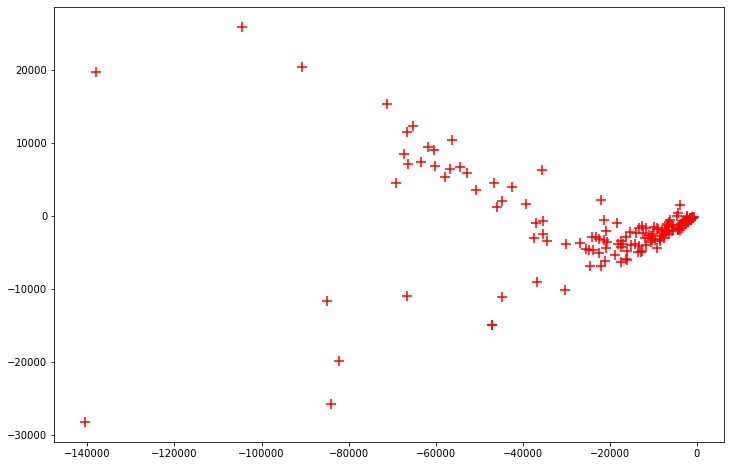

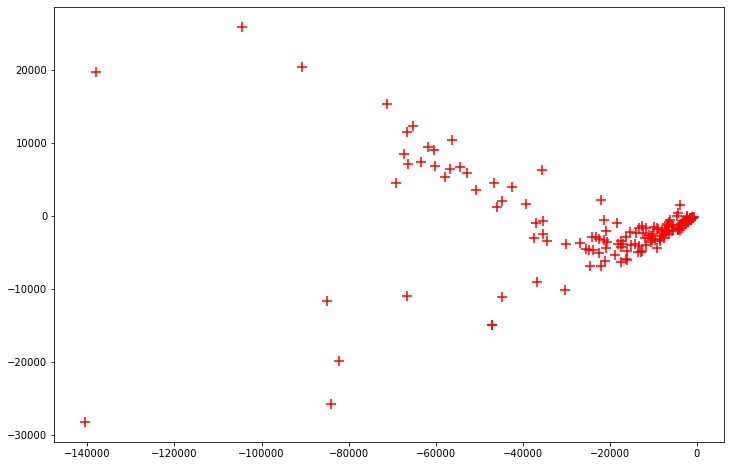

In [22]:
max_iters = 5
k = 3
(m, n) = z.shape
np.random.seed(0)
mu = np.random.randn(k, n)
for i in range(max_iters):
    idx = find_closest_centroids(z, mu)
    centroids = compute_centroids(z, idx, mu)
    plt.figure(figsize = (12, 8))
    color = ['r', 'g', 'b']
    mark = ['+', 'o', '*']
    for i in range(k):
        points = []
        for j in range(m):
            if idx[j, 0] == i:
                points.append(j)
        plt.scatter(z[points, 0], z[points, 1], c = color[i], marker = mark[i], s = 100)

Well, no wonder the results are not good, because we only use PCA in case we do not get our desired results with the data. If we'll apply PCA to every problem unnecessarily, then it will end up getting worse, still the target of the implementation was to get understanding of how PCA works and how is it implemented & that is achieved.